# Week 2 Part 2 - Network Analysis: Centrality Measures
### The p < 0.05 Team - Haig Bedros, Noori Selina, Julia Ferris, Matthew Roland

# Loading the data & EDA

For this project, we will examine the connections among users in a dataset regarding whether or not users purchased an item. The data comes from the Social Network Ads Dataset on Kaggle at the following website: https://www.kaggle.com/datasets/rakeshrau/social-network-ads/data.

In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/hbedros/centrality-measures/main/data/Social_Network_Ads.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


This section checks the data types. It appears the data has the same type of data across each respective column, so there is no need for data normalization.

In [14]:
# Get basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


This section checks for any missing values. It appears the data does not contain any missing values.

In [15]:
# Check for any missing values
print(data.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In the table below, the summary statistics are clearly shown. These statistics are used to detect trends in the data and show the structure of different variables.

In [16]:
# Summary statistics of the dataset
print(data.describe())

            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


Since one of the factors analyzed in this assignment is age, the range is below.

In [17]:
# Age range
print(f"Age ranges from {data['Age'].min()} to {data['Age'].max()} years")

Age ranges from 18 to 60 years


### Interpretation of the Data Overview

#### Data Sample
- **Columns**: User ID, Gender, Age, Estimated Salary, Purchased.

#### Data Information
- **Entries**: 400 users.
- **No Missing Values**: All columns have 400 entries.
- **Data Types**: Mostly integers, Gender is a string.

#### Summary Statistics
- **Age**: 18 to 60 years.
- **Estimated Salary**: 15,000 to 150,000.
- **Purchased**: 0 (not purchased) or 1 (purchased).
- **Percentiles**:
  - 25% of users are 30 or younger, earn 43,000 or less.
  - 50% of users are 37 or younger, earn 70,000 or less.
  - 75% of users are 46 or younger, earn 88,000 or less.

# Creating a Nodal Network

Now, we will partition our data into nodes and edges in order to determine the degree of connectivity among users based on their ages. We will also examine differences based on gender later in this analysis.

In [18]:
# Create a graph from the data
g = nx.Graph()

# We add nodes (users) with attributes (gender, age, salary, purchased)
for index, row in data.iterrows():
    g.add_node(row['User ID'], gender=row['Gender'], age=row['Age'], salary=row['EstimatedSalary'], purchased=row['Purchased'])

# We add edges (connections) between users if they have the same age
# This is hypothetical connection
for i, node1 in enumerate(g.nodes(data=True)):
    for j, node2 in enumerate(g.nodes(data=True)):
        if i != j and node1[1]['age'] == node2[1]['age']:
            g.add_edge(node1[0], node2[0])

# Calculating Degree and Eigenvector Centrality

Next, we will calculate the degree and eigenvector centrality among nodes in order to determine the number of connections each user has (degree centrality), as well as the influence of nodes within this network (eigenvector centrality).

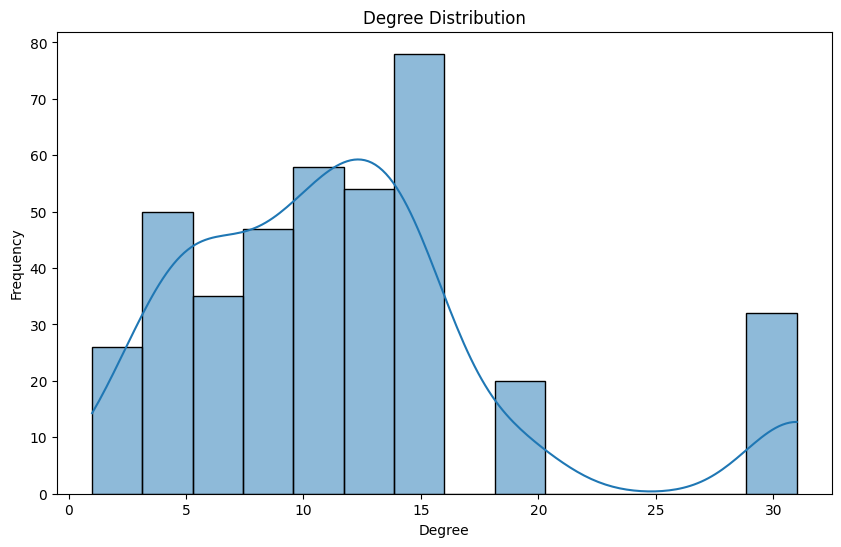

In [19]:
# Degree centrality (number of connections each user has)
degree_centrality = nx.degree_centrality(g)

# Eigenvector centrality (importance of each user based on connections)
eigenvector_centrality = nx.eigenvector_centrality(g)

# Adding centrality measures to the dataset
data['degree_centrality'] = data['User ID'].map(degree_centrality)
data['eigenvector_centrality'] = data['User ID'].map(eigenvector_centrality)

# Plotting the degree distribution (how many connections users have)
degrees = [val for (node, val) in g.degree()]
plt.figure(figsize=(10, 6))
sns.histplot(degrees, kde=True)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

### Interpretation of the Degree Distribution Graph

- **Most Connections**: Most users have around 15 connections.
- **Peaks**: There are peaks at 5, 10, 15, and 30 connections.
- **Range**: Users have between 0 to 31 connections.
- **Gap**: Few users have between 20 to 25 connections.

This graph shows how many connections users typically have in the network.

In [20]:
# The top users by degree centrality (most connected users)
top_users = data.nlargest(10, 'degree_centrality')
print("Top 10 Users by Degree Centrality:")
print(top_users[['User ID', 'degree_centrality']])

bottom_users = data.nsmallest(10, 'degree_centrality')
print("\n Bottom 10 Users by Degree Centrality:")
print(bottom_users[['User ID', 'degree_centrality']])

# Minimum, Average, and Range of Degree
min_degree = min(degrees)
avg_degree = sum(degrees) / len(degrees)
max_degree = max(degrees)

print(f"Minimum Degree: {min_degree}")
print(f"Average Degree: {avg_degree:.2f}")
print(f"Maximum Degree: {max_degree}")
print(f"Degree Range: {max_degree - min_degree}")

Top 10 Users by Degree Centrality:
     User ID  degree_centrality
1   15810944           0.077694
9   15727311           0.077694
35  15713144           0.077694
42  15772798           0.077694
53  15671655           0.077694
83  15711218           0.077694
89  15682268           0.077694
95  15709441           0.077694
96  15710257           0.077694
98  15575694           0.077694

 Bottom 10 Users by Degree Centrality:
      User ID  degree_centrality
250  15810075           0.002506
382  15715622           0.002506
206  15654230           0.005013
227  15685346           0.005013
243  15769596           0.005013
245  15722061           0.005013
262  15672821           0.005013
270  15680752           0.005013
292  15625395           0.005013
297  15705298           0.005013
Minimum Degree: 1
Average Degree: 11.76
Maximum Degree: 31
Degree Range: 30


### Interpretation of the Top and Bottom Users by Degree Centrality

- **Top 10 Users by Degree Centrality**: The top 10 users listed all have the same degree centrality value of 0.077694.
  - This means these users have the highest number of connections in the network.

- **Bottom 10 Users by Degree Centrality**: The bottom 10 users listed have degree centrality values ranging from 0.0025 to 0.005
  - These users have the fewest number of connections in the network

#### Degree Statistics
- **Minimum Degree**: 1
  - The user with the fewest connections has 1 connection.
- **Average Degree**: 11.76
  - On average, each user has about 12 connections.
- **Maximum Degree**: 31
  - The user with the most connections has 31 connections.
- **Degree Range**: 30
  - The difference between the maximum and minimum number of connections is 30.

This summary helps us understand the connectivity of users in the network, highlighting the most connected users and providing an overview of how connected users are on average.

In [21]:
top_users_eigen = data.nlargest(10, 'eigenvector_centrality')
print("Top 10 Users by Eigenvector Centrality:")
print(top_users_eigen[['User ID', 'eigenvector_centrality']])

bottom_users_eigen = data.nsmallest(10, 'eigenvector_centrality')
print("\n Bottom 10 Users by Eigenvector Centrality:")
print(bottom_users_eigen[['User ID', 'eigenvector_centrality']])

Top 10 Users by Eigenvector Centrality:
     User ID  eigenvector_centrality
1   15810944                0.176777
9   15727311                0.176777
35  15713144                0.176777
42  15772798                0.176777
53  15671655                0.176777
83  15711218                0.176777
89  15682268                0.176777
95  15709441                0.176777
96  15710257                0.176777
98  15575694                0.176777

 Bottom 10 Users by Eigenvector Centrality:
      User ID  eigenvector_centrality
250  15810075            2.339620e-24
382  15715622            2.339620e-24
206  15654230            5.186558e-21
227  15685346            5.186558e-21
243  15769596            5.186558e-21
245  15722061            5.186558e-21
262  15672821            5.186558e-21
270  15680752            5.186558e-21
292  15625395            5.186558e-21
297  15705298            5.186558e-21


### Interpretations of Eigenvector Centrality

- **Top 10 Users by Eigenvector Centrality**: The top 10 users listed all have the highest eigenvector centrality values.
  - This means these users are the most influential nodes in the network due to their high connectivity with other highly connected nodes.

- **Bottom 10 Users by Eigenvector Centrality**: The bottom 10 users listed have the lowest eigenvector centrality values.
  - These users are the least influential in the network due

## Visualizations

### Explanation

1. **Define Salary Ranges**:
   - We set up different salary ranges to categorize user incomes.

2. **Get Salary Range Function**:
   - We create a function to find out which salary range a user's income belongs to.

3. **Create and Plot Bipartite Graph**:
   - First, we add nodes for each salary range.
   - Then, we add user nodes combined with their purchase information, like "123456_Purchased" or "123456_Not Purchased."
   - We connect these user nodes to their respective salary range nodes.
   - The graph is plotted with different colors for salary ranges (light blue) and user nodes (green for purchased, red for not purchased).

4. **Data Subset**:
   - We use a smaller portion of the data for easier visualization.

5. **Plot the Graph**:
   - We call the function to draw the bipartite graph.

This process helps us visualize how users in different salary ranges are distributed based on whether they purchased a product, with salary ranges shown at the center of the graph.

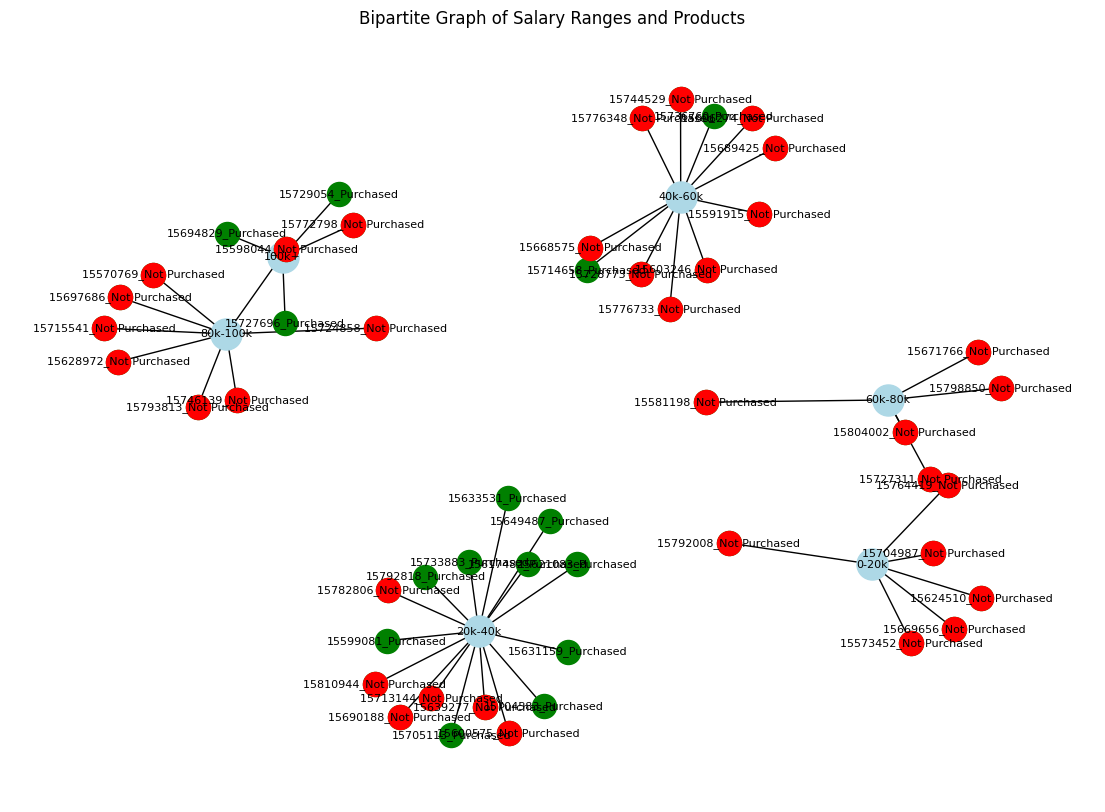

In [22]:
# Define salary ranges
salary_ranges = {
    '0-20k': (0, 20000),
    '20k-40k': (20000, 40000),
    '40k-60k': (40000, 60000),
    '60k-80k': (60000, 80000),
    '80k-100k': (80000, 100000),
    '100k+': (100000, float('inf'))
}

# Function to get salary range
def get_salary_range(salary, salary_ranges):
    for range_name, (low, high) in salary_ranges.items():
        if low <= salary < high:
            return range_name
    return None

# Bipartite graph for salary ranges and products
def plot_salary_range_product_graph(data, salary_ranges):
    g5 = nx.Graph()

    # Add salary range nodes
    for salary_range_name in salary_ranges.keys():
        g5.add_node(salary_range_name, type='salary_range')

    # Add user nodes and connect them to salary ranges
    for index, row in data.iterrows():
        user_node = f"{row['User ID']}_{'Purchased' if row['Purchased'] == 1 else 'Not Purchased'}"
        salary_range_name = get_salary_range(row['EstimatedSalary'], salary_ranges)
        if salary_range_name:
            g5.add_node(user_node, type='user', gender=row['Gender'], age=row['Age'], salary=row['EstimatedSalary'], purchased=row['Purchased'])
            g5.add_edge(salary_range_name, user_node)

    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(g5, seed=42, k=0.3)

    # Separating the nodes by type for distinction
    salary_range_nodes = [node for node, node_data in g5.nodes(data=True) if node_data['type'] == 'salary_range']
    purchased_nodes = [node for node, node_data in g5.nodes(data=True) if 'Purchased' in node]
    not_purchased_nodes = [node for node, node_data in g5.nodes(data=True) if 'Not Purchased' in node]

    # Draw the nodes
    nx.draw_networkx_nodes(g5, pos, nodelist=salary_range_nodes, node_color='lightblue', node_size=500, label='Salary Range')
    nx.draw_networkx_nodes(g5, pos, nodelist=purchased_nodes, node_color='green', node_size=300, label='Purchased')
    nx.draw_networkx_nodes(g5, pos, nodelist=not_purchased_nodes, node_color='red', node_size=300, label='Not Purchased')

    # Draw the edges
    nx.draw_networkx_edges(g5, pos)

    # Draw the labels
    nx.draw_networkx_labels(g5, pos, font_size=8)

    # Customization
    plt.title('Bipartite Graph of Salary Ranges and Products')
    plt.axis('off')
    plt.show()

# Subset of the data for the graph
data1 = data.head(50)

# Plot
plot_salary_range_product_graph(data1, salary_ranges)


### Segmentation of Product Purchases by Salary Range
The bipartite graph shows connections between salary ranges (light blue nodes) and products (light green nodes). Key interpretations:

1. **Distinct Clusters**:
   - Each salary range forms a separate cluster with its own set of products.
   - This indicates specific purchasing behavior for each income group.

2. **Product Diversity**:
   - Users in the 20k-40k and 40k-60k salary ranges show the highest diversity in product purchases.
   - Higher and lower salary ranges have fewer product connections, indicating more specific purchasing preferences.

3. **Minimal Overlap**:
   - There is minimal overlap of products between different salary ranges, suggesting strong segmentation of purchasing behavior by income.

Overall, the graph highlights distinct and segmented purchasing trends based on salary ranges.

### T-Test for Determining Differences in Centrality by Purchase

Next, we will run a t-test examining statistical differences in centrality based on user age depending on whether or not users chose to make a purchase.

In [25]:
from scipy import stats

# Creating groups based on Gender for a t-test
Not_Purchased = data[data['Purchased'] == 0]['degree_centrality']
Purchased = data[data['Purchased'] == 1]['degree_centrality']

t_val, p_val = stats.ttest_ind(Not_Purchased, Purchased)

print(f"t = {round(t_val, 4)}")
print(f"p = {round(p_val, 2)}")


t = 4.6714
p = 0.0


### T-Test Results Conclusion 

Based on an independent two samples t-test, we can see that the influence of purchasing an item is significant in terms of determining differences in degree centrality among nodes, indicating that the choice to purchase an item can be used to predict the relative prominence of nodal connections within clusters.

### Snowball Sampling  (needs updating)

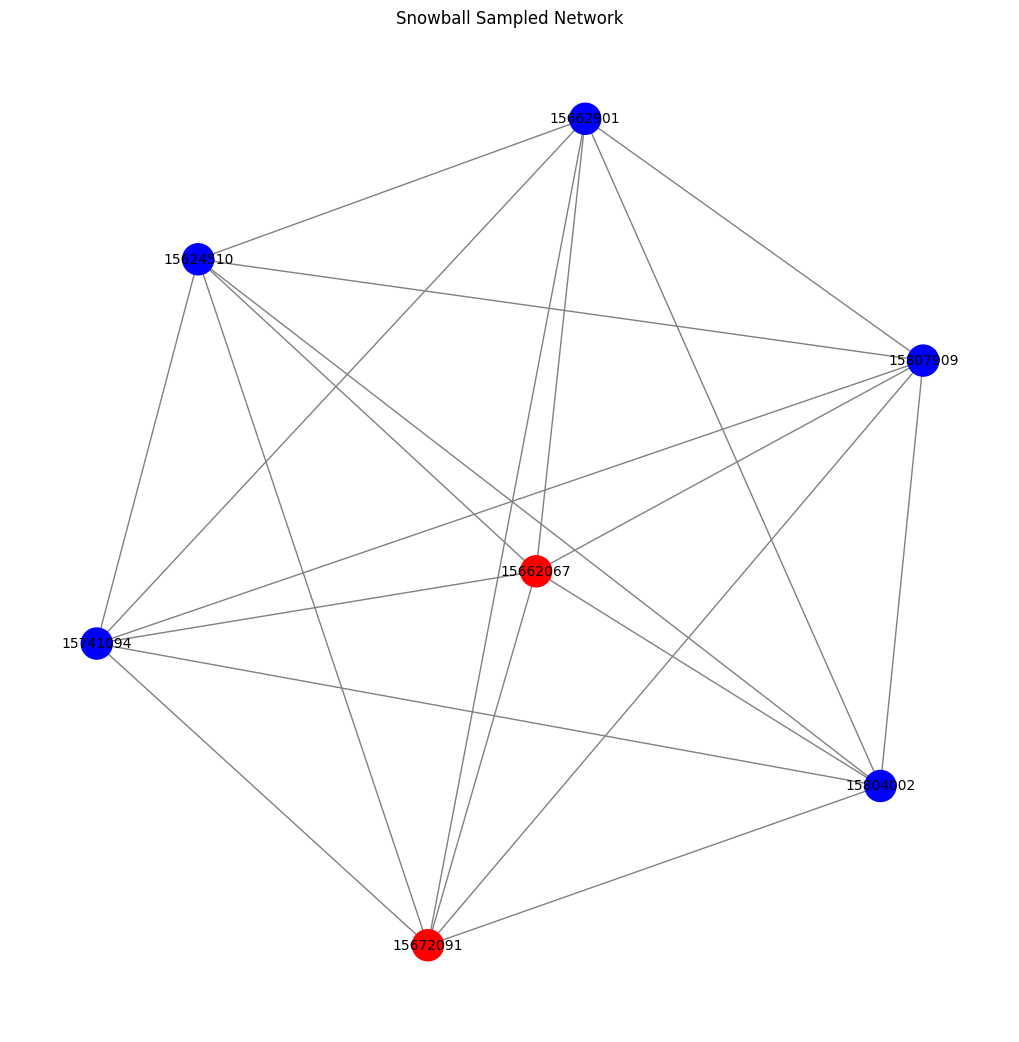

In [24]:
# Snowball Sampling Function
def snowball_sampling(g, start_node, depth):
    """
    Perform snowball sampling on the graph G starting from start_node up to a given depth.
    """
    layers = {start_node: 0}
    visited = set([start_node])
    current_layer = [start_node]

    for d in range(1, depth + 1):
        next_layer = []
        for node in current_layer:
            neighbors = set(g.neighbors(node)) - visited
            next_layer.extend(neighbors)
            visited.update(neighbors)
        layers.update({n: d for n in next_layer})
        current_layer = next_layer

    sampled_nodes = [node for node, layer in layers.items() if layer <= depth]
    return g.subgraph(sampled_nodes)

# Apply snowball sampling with a start node and depth
start_node = data.iloc[0]['User ID']  # Example start node (first user in the dataset)
depth = 2  # Define the depth of sampling
sampled_graph = snowball_sampling(g, start_node, depth)

# Visualization of the Snowball Sampled Network
color_map = {'Male': 'blue', 'Female': 'red'}
colors_sub = [color_map[sampled_graph.nodes[node]['gender']] for node in sampled_graph.nodes]

plt.figure(figsize=(10, 10))
nx.draw(sampled_graph, with_labels=True, node_size=500, node_color=colors_sub, font_size=10, font_color='black', edge_color='gray')
plt.title('Snowball Sampled Network')
plt.show()


### Snowball Sampling  (needs updating)

After performing snowball sampling, the visualization revealed a highly interconnected subgraph with nodes color-coded by gender (blue for Male, red for Female). This dense network highlights key users and their immediate connections. This subset is relevant as it isolates influential nodes, helping us understand their impact on purchasing behavior and develop targeted marketing strategies within their social circles.